# **I. Downloading dataset**


Install the Kaggle package.

In [ ]:
! pip install -q kaggle

Upload the credentials in json format of your Kaggle account (enter your profile and "Create New API Token").

In [ ]:
from google.colab import files
files.upload()

Move json file to ~/.kaggle folder.

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Import dataset from Kaggle.

In [ ]:
! kaggle datasets download -d kmader/rsna-bone-age

Mount to Google Drive and extract files at the selected directory.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! unzip rsna-bone-age.zip -d "/content/drive/My Drive/Colab Notebooks/SSIP2021_v2"

unzip:  cannot find or open rsna-bone-age.zip, rsna-bone-age.zip.zip or rsna-bone-age.zip.ZIP.


# **II. Importing dataset**

Move to the selected directory.

In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/SSIP2021_v2"
#v2

/content/drive/My Drive/Colab Notebooks/SSIP2021_v2


Read the CSV data.

In [4]:
import pandas as pd

df_train = pd.read_csv("boneage-training-dataset.csv")

# **III. Data exploration**

Print the first 5 cases.

In [5]:
df_train.head(5)

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


Present descriptive statistics.

In [6]:
df_train.describe()

,id,boneage
count,12611.000000,12611.000000
mean,8537.653001,127.320752
std,4108.763993,41.182021
min,1377.000000,1.000000
25%,5074.500000,96.000000
50%,8565.000000,132.000000
75%,12091.500000,156.000000
max,15610.000000,228.000000


Plot age distribution, age distribution split by gender, and gender distribution.


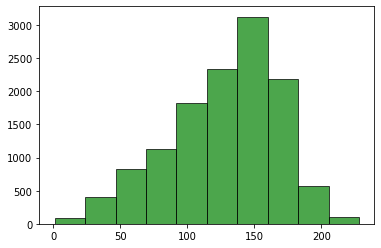

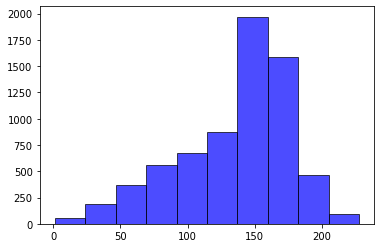

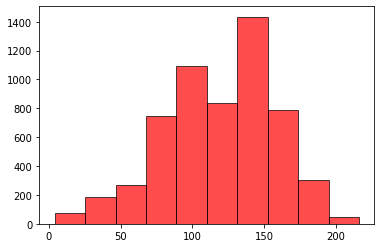

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_train['boneage'], edgecolor='black', color='green', alpha=0.7)
plt.show()

df_male = df_train['boneage'].where(df_train['male'] == True)
plt.hist(df_male, edgecolor='black', color='blue', alpha=0.7)
plt.show()

df_female = df_train['boneage'].where(df_train['male'] == False)
plt.hist(df_female, edgecolor='black', color='red', alpha=0.7)
plt.show()

Print the number of training images.

In [8]:
import os
len(os.listdir("/content/drive/My Drive/Colab Notebooks/SSIP2021_v2/boneage-training-dataset/boneage-training-dataset"))
#v2

12611

Plot some selected images.

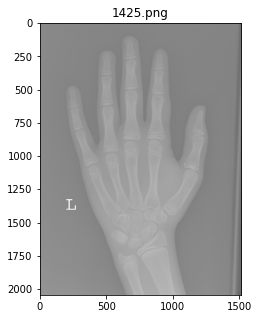

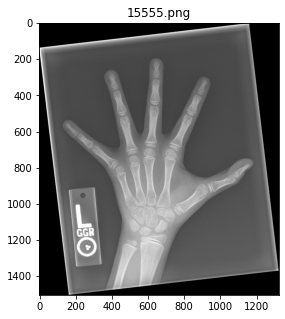

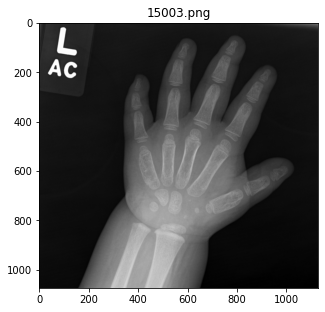

In [26]:
import cv2
from matplotlib import pyplot as plt

figsize = (5,5)
images = ["1425.png", "15555.png", "15003.png"]

for file_name in images:
  image = cv2.imread("/content/drive/My Drive/Colab Notebooks/SSIP2021_v2/boneage-training-dataset/boneage-training-dataset/" + file_name)
  #_v2
  plt.figure(figsize=figsize)
  plt.imshow(image)
  plt.title(file_name)

# **IV. Data preprocessing**

Preprocessing of images with CLAHE.

In [ ]:
import cv2
import os

DIR_PATH = "/content/drive/My Drive/Colab Notebooks/SSIP2021/boneage-training-dataset/boneage-training-dataset/"

NEW_DIR_PATH = "/content/drive/My Drive/Colab Notebooks/SSIP2021/boneage-training-dataset/boneage-training-dataset-HE/"

def clahe_equal(file_name):
  image = cv2.imread(DIR_PATH + file_name)
  lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)
  final_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  cv2.imwrite(NEW_DIR_PATH + file_name, final_image)

for file_name in os.listdir(DIR_PATH):
  clahe_equal(file_name)

In [ ]:
DIR_PATH = "/content/drive/My Drive/Colab Notebooks/SSIP2021_v2/boneage-test-dataset/boneage-test-dataset/"

NEW_DIR_PATH = "/content/drive/My Drive/Colab Notebooks/SSIP2021_v5/boneage-test-dataset/boneage-test-dataset/"

def clahe_equal(file_name):
  image = cv2.imread(DIR_PATH + file_name)
  lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)
  final_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  cv2.imwrite(NEW_DIR_PATH + file_name, final_image)

for file_name in os.listdir(DIR_PATH):
  clahe_equal(file_name)

Feature engineering.

In [ ]:
df_test['id'] = df_test['Case ID']
del(df_test['Case ID'])

In [ ]:
df_train['sex'] = df_train['male'].apply(lambda x: 0 if x else 1)
del(df_train['male'])

df_test['sex'] = df_test['Sex']
df_test['sex'] = df_test['sex'].apply(lambda x: 0.0 if x else 1.0)
del(df_test['Sex'])

In [ ]:
df_train['id'] = df_train['id'].apply(lambda x: str(x) + '.png')
df_test['id'] = df_test['id'].apply(lambda x: str(x) +'.png')

# **V. Transfer learning**

In [ ]:
import tensorflow.keras as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator